<h2>. Classification Analysis done on Game of thrones dataset by Tenbite Abebe </h2>


In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy as np
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import gender_guesser.detector as gender             # guess gender based on (given) name


# loading data
file = 'GOT_character_predictions.xlsx'
GOT_character = pd.read_excel(io = file)


In [2]:
GOT_character.describe(include = 'number').round(2)

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


In [3]:
GOT_character.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [4]:
GOT_character['mother'].value_counts()

Daenaera Velaryon         2
Cersei Lannister          2
Rhaenyra Targaryen        2
Alyssa Velaryon           2
Dyanna Dayne              1
Mariah Martell            1
Alicent Hightower         1
Betha Blackwood           1
Cassana Estermont         1
Rhaenys Targaryen         1
Catelyn Stark             1
Naerys Targaryen          1
Alyssa Targaryen          1
Valaena Velaryon          1
Lady of House Sunderly    1
Shaera Targaryen          1
Visenya Targaryen         1
Name: mother, dtype: int64

In [5]:
# data dictionary
file = "./GOT_data_dictionary.xlsx"
GOT_description = pd.read_excel(file)


# displaying the data dictionary
GOT_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measu...
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house ...
9,spouse,Character's spouse(s)


In [6]:
GOT_character.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

<h2> Missing Value In the Data</h2> 

This dataset is working in analyzing the x variables that can have an effect on the y- variable that is (isAlive) which means if the character is alive or dead. There are columns in this data including Mother father, heir, spouse, and is-alive mother/father/heir/spouse that have missing variables therefore,below they were filled in by new columns by creating dummies. 

The code under replaces the cells that are are empty with unknown and then fills them with dummies with 1 and 0 if there is no information give. And for the other x variables it will use the mode and median to fill in the missing values. 

In [7]:
# applying imputation to the features with missing values
fill_father  = 'father_unknown'
fill_heir    = 'heir_unknown'
fill_house   = 'house_unknown'
fill_spouse  = 'spouse_unknown'
fill_title   = 'title_unknown'
fill_culture = 'culture_unknown'
fill_mother  = 'mother_unknown'


# missing values imputation for title
GOT_character['title'] = GOT_character['title'].fillna(fill_title) 

# creating a new column with a placeholder object
GOT_character['has_title'] = 0

# making dummies for title 1 and no title is 0
for index, value in GOT_character.iterrows():
    
    # Creating a dummy for has_title = 1, so missing values = 0
    if  GOT_character.loc[index, 'title'] != 'title_unknown':
        GOT_character.loc[index, 'has_title'] = 1
        
    elif GOT_character.loc[index, 'title'] == 'title_unknown':
        GOT_character.loc[index, 'has_title'] = 0
        
        
# impute missing values for culture
GOT_character['culture'] = GOT_character['culture'].fillna(fill_culture)

# create a new column with a placeholder object
GOT_character['has_culture'] = 0

#  dummy where m_culture = 0 and those with culture = 1
for index, value in GOT_character.iterrows():
    
    # Create a dummy for has_culture = 1, so missing values = 0
    if GOT_character.loc[index, 'culture'] != 'culture_unknown':
        GOT_character.loc[index, 'has_culture'] = 1
        
    elif GOT_character.loc[index, 'culture'] == 'culture_unknown':
        GOT_character.loc[index, 'has_culture'] = 0
        

#  impute missing values for mother
GOT_character['mother'] = GOT_character['mother'].fillna(fill_mother)

# creating a new column with a placeholder object
GOT_character['has_mother'] = 0

# making dummy where m_mother = 0 and those with mother = 1
for index, value in GOT_character.iterrows():
    
    # Creating a dummy for has_mother = 1, so missing values = 0
    if GOT_character.loc[index, 'mother'] != 'mother_unknown':
        GOT_character.loc[index, 'has_mother'] = 1
        
    elif GOT_character.loc[index, 'mother'] == 'mother_uknown':
        GOT_character.loc[index, 'has_mother'] = 0

            
# impute missing values for father
GOT_character['father'] = GOT_character['father'].fillna(fill_father)

# create a new column with a placeholder object
GOT_character['has_father'] = 0

# make dummy where m_father = 0 and those with father = 1
for index, value in GOT_character.iterrows():
    
    # Creating a dummy for has_father = 1, so missing values = 0
    if GOT_character.loc[index, 'father'] != 'father_unknown':
        GOT_character.loc[index, 'has_father'] = 1
        
    elif GOT_character.loc[index, 'father'] == 'father_unknown':
        GOT_character.loc[index, 'has_father'] = 0
        
        
# impute missing values for heir
GOT_character['heir'] = GOT_character['heir'].fillna(fill_heir)

# create a new column with a placeholder object
GOT_character['has_heir'] = 0

# create a dummy where m_heir = 0 and those with heir = 1
for index, value in GOT_character.iterrows():
    
    # Creating a dummy for has_heir = 1, so missing values = 0
    if GOT_character.loc[index, 'heir'] != 'heir_unknown':
        GOT_character.loc[index, 'has_heir'] = 1
        
    elif GOT_character.loc[index, 'heir'] == 'heir_unknown':
        GOT_character.loc[index, 'has_heir'] = 0


# impute missing values for house
GOT_character['house'] = GOT_character['house'].fillna(fill_house)

# create a new column with a placeholder object
GOT_character['has_house'] = 0

# create a dummy for m_house = 0 and those with house = 1
for index, value in GOT_character.iterrows():
    
    # Create a dummy for has_house = 1, missing values = 0
    if GOT_character.loc[index, 'house'] != 'house_unknown':
        GOT_character.loc[index, 'has_house'] = 1
        
    elif GOT_character.loc[index, 'house'] == 'house_unknown':
        GOT_character.loc[index, 'has_house'] = 0
        
        
# impute missing values for spouse
GOT_character['spouse'] = GOT_character['spouse'].fillna(fill_spouse)

# create a new column with a placeholder object
GOT_character['has_spouse'] = 0

# make dummy for m_spouse = 0 and those with spouse = 1
for index, value in GOT_character.iterrows():
    
    # create a dummy for has_spouse = 1, so missing values = 0
    if GOT_character.loc[index, 'spouse'] != 'spouse_unknown':
        GOT_character.loc[index, 'has_spouse'] = 1
        
    elif GOT_character.loc[index, 'spouse'] == 'spouse_unknown':
        GOT_character.loc[index, 'has_spouse'] = 0

In [8]:
# impute missing values dateOfBirth
GOT_character['dateOfBirth'].fillna(GOT_character['dateOfBirth'].median(), inplace = True)

# impute missing values for age
GOT_character['age'].fillna(int(GOT_character['age'].median()), inplace=True)

# impute missing values for isAliveMother
GOT_character['isAliveMother'].fillna(int(GOT_character['isAliveMother'].mode()), inplace=True)

# impute missing values for isAliveFather
GOT_character['isAliveFather'].fillna(int(GOT_character['isAliveMother'].mode()), inplace=True)

# impute missing values for isAliveHeir
GOT_character['isAliveHeir'].fillna(int(GOT_character['isAliveHeir'].mode()), inplace=True)

# impute missing values for isAliveSpouse
GOT_character['isAliveSpouse'].fillna(int(GOT_character['isAliveSpouse'].mode()), inplace=True)

In [9]:
#made a dummy for the spouse_unknown = 0 and those with spouse = 1
for index, value in GOT_character.iterrows():
    
    # create a dummy for spouse_unknown = 1, so missing values = 0
    if GOT_character.loc[index, 'has_mother'] == 1:
        GOT_character.loc[index, 'isAliveMother'] = 1
    #the elif statement for = 0
    elif GOT_character.loc[index, 'has_mother'] == 0:
        GOT_character.loc[index, 'isAliveMother'] = 0

<h2>. Gender Guesser implementation </h2>

I worked on implementing the gender guesser, however, after grouping the males and running a correlation it showed that male is 0.00 correlation to isAlive. Therefore, gender guesser was taken out of this script to avoid it running for too long. 

In [10]:
GOT_character.isnull().sum()

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
has_title                     0
has_culture                   0
has_mother                    0
has_father                    0
has_heir                      0
has_house                     0
has_spou

<h2>Feature Engineering </h2>

In the data, depending on specific X-values could determine if the character is alive or dead.  

In the show, specific houses were in war, therefore most of ended up loosing most of their people. For example, the Targarians had a mad king and dragons and most of them didn't survive. Through research and watching the show, characters continued to die as you move down from each book. Taking these insights to account feature engineering will help finding the best model affecting the characters that are alive. 

Great House. Game of Thrones Wiki. (2021). Retrieved December 4, 2021, from      https://gameofthrones.fandom.com/wiki/Great_House. 



In [11]:
#Feature engineering
#New columns based of mothers education and mothers age
 
#Here looking into the title of the father and mother  
GOT_character['has_titFath']= GOT_character['has_title']+(GOT_character['has_father']/2)
GOT_character['has_titMoth']= GOT_character['has_title']+(GOT_character['has_mother']/2)

#Here looking into books 4 and 5
GOT_character['book4_book5']= GOT_character['book4_A_Feast_For_Crows']+(GOT_character['book5_A_Dance_with_Dragons']/2) 

#Here looking into the use 
GOT_character['hastitHous']= GOT_character['has_title']+(GOT_character['has_house']/2)

GOT_character['numDeadReHastit']= GOT_character['numDeadRelations']+(GOT_character['has_title']/2)
GOT_character['numDeadReHasheir']= GOT_character['has_title']+(GOT_character['has_heir']/2)

GOT_character['ismarIsnob']= GOT_character['isMarried']+(GOT_character['isNoble']/2)
GOT_character['hasCultit']= GOT_character['has_culture']+(GOT_character['has_title']/2)

GOT_character['isAlivMotFat']= GOT_character['isAliveMother']+(GOT_character['isAliveFather']/2)

GOT_character['hasTitNob']= GOT_character['has_title']+(GOT_character['isNoble']/2)
GOT_character['isAlivMotFat']= GOT_character['isAliveMother']+(GOT_character['isAliveFather']/2)
GOT_character['isAlivHeMoth']= GOT_character['isAliveHeir']+(GOT_character['isAliveMother']/2)
GOT_character['isAlivHeFath']= GOT_character['isAliveHeir']+(GOT_character['isAliveFather']/2)

GOT_character['hasMothAlivHeir']= GOT_character['has_mother']+(GOT_character['isAliveHeir']/2)
GOT_character['hasMothAlivFath']= GOT_character['has_mother']+(GOT_character['isAliveFather']/2)

<h2>. Logistical Regression </h2>

In [12]:
GOT_character_corr = GOT_character.corr(method = 'pearson').round(2)

print(GOT_character_corr.loc ['isAlive'].sort_values(ascending = False))

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
book4_book5                   0.23
isAlivHeFath                  0.14
isAliveFather                 0.13
isAliveHeir                   0.11
isAliveSpouse                 0.08
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAlivHeMoth                 -0.01
hasTitNob                    -0.04
has_culture                  -0.04
has_title                    -0.04
has_house                    -0.04
isNoble                      -0.04
has_spouse                   -0.05
hastitHous                   -0.05
dateOfBirth                  -0.05
hasCultit                    -0.05
isMarried                    -0.05
has_titMoth                  -0.06
has_titFath                  -0.06
ismarIsnob                   -0.06
numDeadReHasheir             -0.06
book2_A_Clash_Of_Kings       -0.07
isAlivMotFat                 -0.12
hasMothAlivFath              -0.12
hasMothAlivHeir     

In [13]:
for val in GOT_character:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 isAlive + 
 has_title + 
 has_culture + 
 has_mother + 
 has_father + 
 has_heir + 
 has_house + 
 has_spouse + 
 has_titFath + 
 has_titMoth + 
 book4_book5 + 
 hastitHous + 
 numDeadReHastit + 
 numDeadReHasheir + 
 ismarIsnob + 
 hasCultit + 
 isAlivMotFat + 
 hasTitNob + 
 isAlivHeMoth + 
 isAlivHeFath + 
 hasMothAlivHeir + 
 hasMothAlivFath + 


In [14]:
# declaring explanatory variables
GOT_character_data = GOT_character.drop('isAlive', axis = 1)


# declaring response variable
GOT_character_target = GOT_character.loc[ : ,'isAlive']

In [15]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_character_data,
            GOT_character_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_character_target) # preserving balance


# merging training data for statsmodels
GOT_character_train = pd.concat([x_train, y_train], axis = 1)

In [16]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



Below is the logistic regression for the full model.

In [17]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive ~  
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isNoble + 
 age + 
 dateOfBirth +
 numDeadRelations + 
 popularity + 
 has_title + 
 has_culture + 
 has_mother + 
 has_father + 
 has_heir + 
 has_house + 
 has_spouse 

 """,  data    = GOT_character_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary2()

Optimization terminated successfully.
         Current function value: 0.432172
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.238     
Dependent Variable:     isAlive              AIC:                  1549.4674 
Date:                   2021-12-05 10:40     BIC:                  1647.8904 
No. Observations:       1751                 Log-Likelihood:       -756.73   
Df Model:               17                   LL-Null:              -992.53   
Df Residuals:           1733                 LLR p-value:          1.7951e-89
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                  -60.1963   8.0177 -7.5079 0.0000 -75.9107 -44.4819
book1_A_Game_Of_Thrones     -0.5946   0.1664 -3.5732 0.0004  -0.9207  -0.2684
book2_A_Clash_Of_Kings      -0.6393   0.1476 -4.3326 0.0000  -0.9286  -0.3501
book3_A_Storm_Of_Swords     -0.5213   0.1550 -3.3637 0.0008  -0.8250  -0.2175
book4_A_Feast_For_Crows      1.3990   0.1623  8.6223 0.0000   1.0810   1.7171
book5_A_Dance_with_Dragons  -0.1169   0.1558 -0.7506 0.4529  -0.4223   0.1884
isNoble                      0.1153   0.4583  0.2516 0.8013  -0.7830   1.0136
age                          0.2092   0.0272  7.6885 0.0000   0.1558   0.2625
dateOfBirth                  0.2091   0.0272  7.6877 0.0000   0.1558   0.2625
numDeadRelations            -0.0631   0.0635 -0.9942 0.3201  -0.1876   0.0613
popularity                  -2.0149   0.5900 -3.4148 0.0006  -3.1713  -0.8584
has_title                   -0.0236   0.4547 -0.0520 0.9586  -0.9148   0.8676
has_culture                 -0.0508   0.1422 -0.3574 0.7208  -0.3294   0.2278
has_mother                  -1.0806   1.2273 -0.8805 0.3786  -3.4861   1.3248
has_father                  -0.1884   1.0491 -0.1796 0.8575  -2.2447   1.8679
has_heir                    -0.2789   0.9253 -0.3014 0.7631  -2.0923   1.5346
has_house                   -0.3958   0.1705 -2.3213 0.0203  -0.7300  -0.0616
has_spouse                   0.2491   0.2197  1.1337 0.2569  -0.1816   0.6798
=============================================================================

"""

Below is the logistic regression for the lower pvalues model.

In [18]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ isAlive ~
 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords +                             
 book4_book5 +
 age +  
 popularity 
 """,
                                     data    = GOT_character_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig. summary2()

Optimization terminated successfully.
         Current function value: 0.440904
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.222     
Dependent Variable:    isAlive             AIC:                 1560.0464 
Date:                  2021-12-05 10:41    BIC:                 1603.7900 
No. Observations:      1751                Log-Likelihood:      -772.02   
Df Model:              7                   LL-Null:             -992.53   
Df Residuals:          1743                LLR p-value:         3.7610e-91
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -63.0739   8.0205 -7.8641 0.0000 -78.7938 -47.3540
dateOfBirth               0.2179   0.0272  8.0014 0.0000   0.1645   0.2713
book1_A_Game_Of_Thrones  -0.6807   0.1605 -4.2406 0.0000  -0.9953  -0.3661
book2_A_Clash_Of_Kings   -0.6362   0.1442 -4.4115 0.0000  -0.9189  -0.3536
book3_A_Storm_Of_Swords  -0.4327   0.1487 -2.9111 0.0036  -0.7241  -0.1414
book4_book5               0.9984   0.1177  8.4841 0.0000   0.7678   1.2291
age                       0.2180   0.0272  8.0024 0.0000   0.1646   0.2713
popularity               -2.8343   0.3986 -7.1113 0.0000  -3.6155  -2.0531
==========================================================================

"""

Below is the logistic regression for the final model with feature engineered insight.

In [19]:
# instantiating a logistic regression model object
logit_sig_2 = smf.logit(formula = """ isAlive ~
 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords +                             
 book4_book5 +
 age + 
 isAlivHeFath +
 popularity 
 """,
                                     data    = GOT_character_train)


# fitting the model object
logit_sig_2 = logit_sig_2.fit()


# checking the results SUMMARY
logit_sig_2. summary2()

Optimization terminated successfully.
         Current function value: 0.439093
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.225     
Dependent Variable:    isAlive             AIC:                 1555.7034 
Date:                  2021-12-05 10:41    BIC:                 1604.9149 
No. Observations:      1751                Log-Likelihood:      -768.85   
Df Model:              8                   LL-Null:             -992.53   
Df Residuals:          1742                LLR p-value:         1.3570e-91
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -63.1499   7.7590 -8.1389 0.0000 -78.3573 -47.9425
dateOfBirth               0.2081   0.0264  7.8818 0.0000   0.1564   0.2599
book1_A_Game_Of_Thrones  -0.7216   0.1609 -4.4843 0.0000  -1.0370  -0.4062
book2_A_Clash_Of_Kings   -0.6607   0.1446 -4.5700 0.0000  -0.9441  -0.3774
book3_A_Storm_Of_Swords  -0.4609   0.1494 -3.0852 0.0020  -0.7536  -0.1681
book4_book5               0.9611   0.1186  8.1045 0.0000   0.7286   1.1935
age                       0.2081   0.0264  7.8828 0.0000   0.1564   0.2599
isAlivHeFath              2.0080   1.0173  1.9738 0.0484   0.0141   4.0019
popularity               -2.3567   0.4461 -5.2827 0.0000  -3.2311  -1.4823
==========================================================================

"""

In [20]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons','isNoble','age', 'dateOfBirth',
                   'numDeadRelations','popularity', 'has_title', 'has_culture','has_mother', 'has_father', 
                   'has_heir', 'has_house','has_spouse' ],
 

 # significant variables only (set 1)
 'logit_sig'    : ['dateOfBirth', 'book1_A_Game_Of_Thrones' , 'book2_A_Clash_Of_Kings' , 
                   'book3_A_Storm_Of_Swords', 'book4_book5', 'age', 'popularity'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['dateOfBirth', 'book1_A_Game_Of_Thrones' , 'book2_A_Clash_Of_Kings' , 
                   'book3_A_Storm_Of_Swords', 'book4_book5', 'age', 'isAlivHeFath', 'popularity'],

}

In [21]:
#help(LogisticRegression)

In [22]:
# train/test split with the full model
GOT_character_data   =  GOT_character.loc[ : , candidate_dict['logit_sig']]
GOT_character_target =  GOT_character.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_character_data,
            GOT_character_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_character_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'newton-cg',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# saving AUC
print( 'LogReg_AUC_Score        :',roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))
LogReg_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = logreg_pred).round(4) # auc  

LogReg Training ACCURACY: 0.8075
LogReg Testing  ACCURACY: 0.8462
LogReg Train-Test Gap   : 0.0387
LogReg_AUC_Score        : 0.7131


/Users/tenbiteabebe/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/tenbiteabebe/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


<h2>Confusion Matrix </h2>

In [23]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 22  28]
 [  2 143]]


In [24]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 2
True Positives : 143



<h2> Classification Trees (Chart) </h2>

In [25]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [26]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc  
print('Train-Test Gap   :', abs(full_tree_train_score - full_tree_test_score).round(4))
train_test_gap = abs(full_tree_train_score - full_tree_test_score).round(4)



Full Tree Training ACCURACY: 0.916
Full Tree Testing ACCURACY : 0.8
Full Tree AUC Score: 0.7541
Train-Test Gap   : 0.116


In [27]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 22
True Positives : 123



In [28]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 1 ,
                                     random_state = 219,
                                      )


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc
# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
train_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)


Training ACCURACY: 0.8515
Testing  ACCURACY: 0.8462
AUC Score        : 0.759
Train-Test Gap   : 0.0053


In [29]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 9
True Positives : 136



In [30]:
#help(DecisionTreeClassifier)

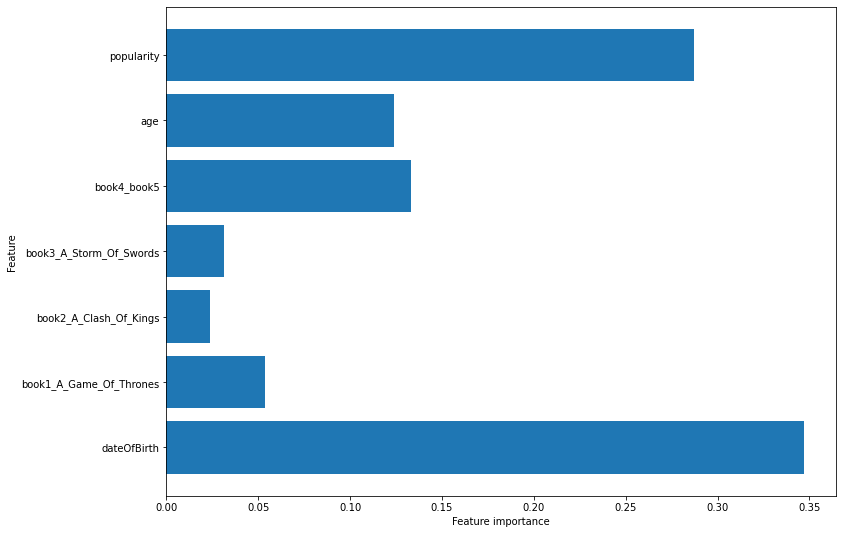

In [31]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

<h2>Final Model </h2>

In [32]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {LogReg_auc_score }         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
*Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [LogReg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.7131         (22, 28, 2, 143)
Full Tree     0.7541           (33, 17, 22, 123)
*Pruned Tree   0.759         (29, 21, 9, 136)



* shows The final model is pruned tree. 

This model predicts the characters that are still alive in the dataset. In this case, the AUC score in the pruned tree model is higher than the logistic, therefore, it was picked to be the final model. The prune tree also shows that the true positive is 136 and the true negative is 29 compared to other models however in the full three the TN and TP are lower. 